In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pp, metrics as mt, linear_model as lm, ensemble as ens, model_selection as ms, feature_selection as fs
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("data/Challenge1_train_data.csv", parse_dates=["date"])
df

,date,dc_name,size_code,retail_price,total_tires,zip_code
0,2022-02-05,OAKLAND,1856015,70.090,1,94604
1,2021-03-02,OAKLAND,1856015,59.090,1,94604
2,2020-12-08,OAKLAND,1856015,53.545,1,94604
3,2022-01-17,OAKLAND,1856015,58.410,1,94604
4,2020-11-13,OAKLAND,1856015,43.085,1,94604
...,...,...,...,...,...,...
284695,2022-07-24,BAKERSFIELD,3512520,0.000,0,93308
284696,2020-11-22,BAKERSFIELD,3512520,0.000,0,93308
284697,2021-08-08,BAKERSFIELD,3512520,0.000,0,93308
284698,2022-02-14,BAKERSFIELD,3512520,0.000,0,93308


In [3]:
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["quarter"] = df["date"].dt.quarter
df["weekday"] = df["date"].dt.weekday
df

,date,dc_name,size_code,retail_price,total_tires,zip_code,month,year,quarter,weekday
0,2022-02-05,OAKLAND,1856015,70.090,1,94604,2,2022,1,5
1,2021-03-02,OAKLAND,1856015,59.090,1,94604,3,2021,1,1
2,2020-12-08,OAKLAND,1856015,53.545,1,94604,12,2020,4,1
3,2022-01-17,OAKLAND,1856015,58.410,1,94604,1,2022,1,0
4,2020-11-13,OAKLAND,1856015,43.085,1,94604,11,2020,4,4
...,...,...,...,...,...,...,...,...,...,...
284695,2022-07-24,BAKERSFIELD,3512520,0.000,0,93308,7,2022,3,6
284696,2020-11-22,BAKERSFIELD,3512520,0.000,0,93308,11,2020,4,6
284697,2021-08-08,BAKERSFIELD,3512520,0.000,0,93308,8,2021,3,6
284698,2022-02-14,BAKERSFIELD,3512520,0.000,0,93308,2,2022,1,0


In [4]:
df = df.sort_values("date").reset_index(drop=True)
df

,date,dc_name,size_code,retail_price,total_tires,zip_code,month,year,quarter,weekday
0,2020-09-20,SAN JOSE,2756518,0.000,0,95131,9,2020,3,6
1,2020-09-20,BAKERSFIELD,2454019,0.000,0,93308,9,2020,3,6
2,2020-09-20,SACRAMENTO,2557018,0.000,0,95838,9,2020,3,6
3,2020-09-20,OAKLAND,2756020,0.000,0,94604,9,2020,3,6
4,2020-09-20,OAKLAND,2457516,0.000,0,94604,9,2020,3,6
...,...,...,...,...,...,...,...,...,...,...
284695,2022-09-19,BAKERSFIELD,2257016,0.000,0,93308,9,2022,3,0
284696,2022-09-19,SACRAMENTO,2555518,224.910,10,95838,9,2022,3,0
284697,2022-09-19,SAN JOSE,2255517,0.000,0,95131,9,2022,3,0
284698,2022-09-19,BAKERSFIELD,2456517,173.535,33,93308,9,2022,3,0


In [5]:
df["split"] = "train"
df.loc[df.date >= "2022-09-12", "split"] = "test"
df

,date,dc_name,size_code,retail_price,total_tires,zip_code,month,year,quarter,weekday,split
0,2020-09-20,SAN JOSE,2756518,0.000,0,95131,9,2020,3,6,train
1,2020-09-20,BAKERSFIELD,2454019,0.000,0,93308,9,2020,3,6,train
2,2020-09-20,SACRAMENTO,2557018,0.000,0,95838,9,2020,3,6,train
3,2020-09-20,OAKLAND,2756020,0.000,0,94604,9,2020,3,6,train
4,2020-09-20,OAKLAND,2457516,0.000,0,94604,9,2020,3,6,train
...,...,...,...,...,...,...,...,...,...,...,...
284695,2022-09-19,BAKERSFIELD,2257016,0.000,0,93308,9,2022,3,0,test
284696,2022-09-19,SACRAMENTO,2555518,224.910,10,95838,9,2022,3,0,test
284697,2022-09-19,SAN JOSE,2255517,0.000,0,95131,9,2022,3,0,test
284698,2022-09-19,BAKERSFIELD,2456517,173.535,33,93308,9,2022,3,0,test


<AxesSubplot:xlabel='month', ylabel='retail_price'>

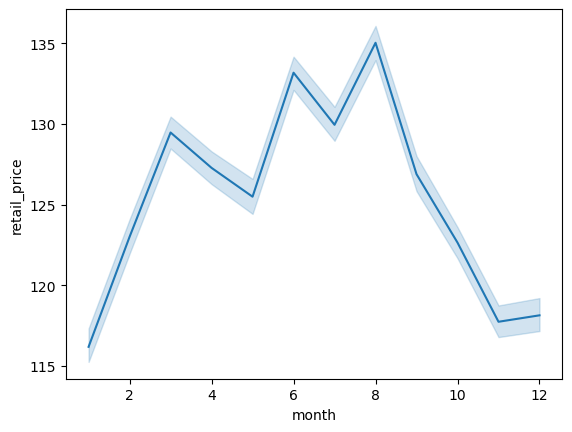

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.lineplot(df, x="month", y="retail_price")

In [55]:
df["month_mean_price"] = df["month"].map(df.groupby("month")["retail_price"].mean())
df["month_mean_price"]

date
2020-09-20    126.893201
2020-09-20    126.893201
2020-09-20    126.893201
2020-09-20    126.893201
2020-09-20    126.893201
                 ...    
2022-09-19    126.893201
2022-09-19    126.893201
2022-09-19    126.893201
2022-09-19    126.893201
2022-09-19    126.893201
Name: month_mean_price, Length: 284700, dtype: float64

In [67]:
df["year_mean_price"] = df["year"].map(df.groupby("year")["retail_price"].mean())
df["year_mean_price"]

date
2020-09-20    108.939846
2020-09-20    108.939846
2020-09-20    108.939846
2020-09-20    108.939846
2020-09-20    108.939846
                 ...    
2022-09-19    137.429338
2022-09-19    137.429338
2022-09-19    137.429338
2022-09-19    137.429338
2022-09-19    137.429338
Name: year_mean_price, Length: 284700, dtype: float64

In [107]:
extra = pd.read_csv("data/Monthly_Transportation_Statistics.csv", parse_dates=["Date"], index_col=0)
extra.columns = extra.columns.str.lower().str.replace(r"[\s\-]+", "_", regex=True)
extra = extra.set_index("date").interpolate(method="time", axis=0, limit_direction="both")
extra

,air_safety_general_aviation_fatalities,highway_fatalities_per_100_million_vehicle_miles_traveled,highway_fatalities,u.s._airline_traffic_total_seasonally_adjusted,u.s._airline_traffic_international_seasonally_adjusted,u.s._airline_traffic_domestic_seasonally_adjusted,transit_ridership_other_transit_modes_adjusted,transit_ridership_fixed_route_bus_adjusted,transit_ridership_urban_rail_adjusted,freight_rail_intermodal_units,...,heavy_truck_sales_saar_(millions),u.s._airline_traffic_total_non_seasonally_adjusted,light_truck_sales_saar_(millions),u.s._airline_traffic_international_non_seasonally_adjusted,auto_sales_saar_(millions),u.s._airline_traffic_domestic_non_seasonally_adjusted,transborder_total_north_american_freight,transborder_u.s._mexico_freight,u.s._marketing_air_carriers_on_time_performance_(percent),transborder_u.s._canada_freight
date,,,,,,,,,,,,,,,,,,,,,
1947-01-01,2.0,1.22,8459.0,70190000.0,8910000.0,61280000.0,11117998.0,430318522.0,276530991.0,4.089000e+05,...,359000.0,70190000.0,1235000.0,8910000.0,8466000.0,61280000.0,6.936667e+10,2.588985e+10,0.8,4.347682e+10
1947-02-01,2.0,1.22,8459.0,70190000.0,8910000.0,61280000.0,11117998.0,430318522.0,276530991.0,4.089000e+05,...,359000.0,70190000.0,1235000.0,8910000.0,8466000.0,61280000.0,6.936667e+10,2.588985e+10,0.8,4.347682e+10
1947-03-01,2.0,1.22,8459.0,70190000.0,8910000.0,61280000.0,11117998.0,430318522.0,276530991.0,4.089000e+05,...,359000.0,70190000.0,1235000.0,8910000.0,8466000.0,61280000.0,6.936667e+10,2.588985e+10,0.8,4.347682e+10
1947-04-01,2.0,1.22,8459.0,70190000.0,8910000.0,61280000.0,11117998.0,430318522.0,276530991.0,4.089000e+05,...,359000.0,70190000.0,1235000.0,8910000.0,8466000.0,61280000.0,6.936667e+10,2.588985e+10,0.8,4.347682e+10
1947-05-01,2.0,1.22,8459.0,70190000.0,8910000.0,61280000.0,11117998.0,430318522.0,276530991.0,4.089000e+05,...,359000.0,70190000.0,1235000.0,8910000.0,8466000.0,61280000.0,6.936667e+10,2.588985e+10,0.8,4.347682e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.0,1.27,11750.0,69890000.0,8900000.0,61000000.0,14405907.0,236169275.0,232987633.0,1.033906e+06,...,491000.0,80360000.0,10644000.0,10950000.0,2675000.0,69410000.0,1.325588e+11,6.515475e+10,0.7,6.740403e+10
2022-08-01,1.0,1.27,11750.0,69890000.0,8900000.0,61000000.0,15226676.0,262509856.0,243219030.0,1.335618e+06,...,504000.0,80360000.0,10407000.0,10950000.0,2778000.0,69410000.0,1.403394e+11,7.029840e+10,0.8,7.004101e+10
2022-09-01,37.0,1.27,11750.0,69890000.0,8900000.0,61000000.0,14011308.0,274285409.0,262576815.0,1.196781e+06,...,475000.0,80360000.0,10671000.0,10950000.0,2910000.0,69410000.0,1.339345e+11,6.742260e+10,0.8,6.651188e+10


In [111]:
df["month_start"] = pd.to_datetime(df.index.map(lambda x: f"{x.year}-{x.month}-01"))
df["month_start"]

date
2020-09-20   2020-09-01
2020-09-20   2020-09-01
2020-09-20   2020-09-01
2020-09-20   2020-09-01
2020-09-20   2020-09-01
                ...    
2022-09-19   2022-09-01
2022-09-19   2022-09-01
2022-09-19   2022-09-01
2022-09-19   2022-09-01
2022-09-19   2022-09-01
Name: month_start, Length: 284700, dtype: datetime64[ns]

In [120]:
df = df.reset_index().join(extra.loc[df.month_start].reset_index().drop(columns="date")).set_index("date")
df

,dc_name,size_code,retail_price,total_tires,zip_code,month,year,quarter,weekday,split,...,heavy_truck_sales_saar_(millions),u.s._airline_traffic_total_non_seasonally_adjusted,light_truck_sales_saar_(millions),u.s._airline_traffic_international_non_seasonally_adjusted,auto_sales_saar_(millions),u.s._airline_traffic_domestic_non_seasonally_adjusted,transborder_total_north_american_freight,transborder_u.s._mexico_freight,u.s._marketing_air_carriers_on_time_performance_(percent),transborder_u.s._canada_freight
date,,,,,,,,,,,,,,,,,,,,,
2020-09-20,SAN JOSE,2756518,0.000,0,95131,9,2020,3,6,train,...,436000.0,25270000.0,12471000.0,1410000.0,3785000.0,23850000.0,9.642278e+10,4.853835e+10,0.9,4.788442e+10
2020-09-20,BAKERSFIELD,2454019,0.000,0,93308,9,2020,3,6,train,...,436000.0,25270000.0,12471000.0,1410000.0,3785000.0,23850000.0,9.642278e+10,4.853835e+10,0.9,4.788442e+10
2020-09-20,SACRAMENTO,2557018,0.000,0,95838,9,2020,3,6,train,...,436000.0,25270000.0,12471000.0,1410000.0,3785000.0,23850000.0,9.642278e+10,4.853835e+10,0.9,4.788442e+10
2020-09-20,OAKLAND,2756020,0.000,0,94604,9,2020,3,6,train,...,436000.0,25270000.0,12471000.0,1410000.0,3785000.0,23850000.0,9.642278e+10,4.853835e+10,0.9,4.788442e+10
2020-09-20,OAKLAND,2457516,0.000,0,94604,9,2020,3,6,train,...,436000.0,25270000.0,12471000.0,1410000.0,3785000.0,23850000.0,9.642278e+10,4.853835e+10,0.9,4.788442e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19,BAKERSFIELD,2257016,0.000,0,93308,9,2022,3,0,test,...,475000.0,80360000.0,10671000.0,10950000.0,2910000.0,69410000.0,1.339345e+11,6.742260e+10,0.8,6.651188e+10
2022-09-19,SACRAMENTO,2555518,224.910,10,95838,9,2022,3,0,test,...,475000.0,80360000.0,10671000.0,10950000.0,2910000.0,69410000.0,1.339345e+11,6.742260e+10,0.8,6.651188e+10
2022-09-19,SAN JOSE,2255517,0.000,0,95131,9,2022,3,0,test,...,475000.0,80360000.0,10671000.0,10950000.0,2910000.0,69410000.0,1.339345e+11,6.742260e+10,0.8,6.651188e+10


In [6]:
sub_dfs = {name: frame for name, frame in df.groupby(["dc_name", "size_code"])}

In [7]:
for (dc, code), sub_df in sub_dfs.items():
    dc = dc.lower().replace(" ", "_")
    new_col = f"total_tires_{dc}_{code}"
    df[new_col] = sub_df["total_tires"]
    
df.columns

C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = sub_df["total_tires"]
C:\Users\ndgig\AppData\Local\Temp\ipykernel_21100\3910019448.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

Index(['date', 'dc_name', 'size_code', 'retail_price', 'total_tires',
       'zip_code', 'month', 'year', 'quarter', 'weekday',
       ...
       'total_tires_san_jose_2657516', 'total_tires_san_jose_2755520',
       'total_tires_san_jose_2756020', 'total_tires_san_jose_2756518',
       'total_tires_san_jose_2756520', 'total_tires_san_jose_2757018',
       'total_tires_san_jose_2854522', 'total_tires_san_jose_2857017',
       'total_tires_san_jose_3512520', 'total_tires_san_jose_22570195'],
      dtype='object', length=401)

In [8]:
targets = df.filter(like=r"total_tires_").columns
targets

Index(['total_tires_bakersfield_1856015', 'total_tires_bakersfield_1856514',
       'total_tires_bakersfield_1856515', 'total_tires_bakersfield_1956015',
       'total_tires_bakersfield_1956515', 'total_tires_bakersfield_2055016',
       'total_tires_bakersfield_2055017', 'total_tires_bakersfield_2055516',
       'total_tires_bakersfield_2056016', 'total_tires_bakersfield_2056515',
       ...
       'total_tires_san_jose_2657516', 'total_tires_san_jose_2755520',
       'total_tires_san_jose_2756020', 'total_tires_san_jose_2756518',
       'total_tires_san_jose_2756520', 'total_tires_san_jose_2757018',
       'total_tires_san_jose_2854522', 'total_tires_san_jose_2857017',
       'total_tires_san_jose_3512520', 'total_tires_san_jose_22570195'],
      dtype='object', length=390)

In [10]:
df["since_2020"] = (df.index - pd.to_datetime("2020-01-01")).total_seconds()

In [11]:
df["total_tires_bakersfield_1856015"]

date
2020-09-20    0.0
2020-09-20    0.0
2020-09-20    0.0
2020-09-20    0.0
2020-09-20    0.0
             ... 
2022-09-19    9.0
2022-09-19    9.0
2022-09-19    9.0
2022-09-19    9.0
2022-09-19    9.0
Name: total_tires_bakersfield_1856015, Length: 284700, dtype: float64

In [12]:
df = df.set_index("date").interpolate(method="time", axis=0, limit_direction="both")
df

KeyError: "None of ['date'] are in the columns"

In [124]:
X_cols = extra.columns.to_list() + ["year_mean_price", "month_mean_price", "since_2020", "retail_price", "month", "year", "quarter", "weekday"]
X_train = df.loc[df.split == "train", X_cols].copy()
y_train = df.loc[df.split == "train", "total_tires_bakersfield_2056515"].copy()
X_test = df.loc[df.split == "test", X_cols].copy()
y_test = df.loc[df.split == "test", "total_tires_bakersfield_2056515"].copy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((281580, 142), (281580,), (3120, 142), (3120,))

In [96]:
from xgboost import XGBRegressor

In [125]:
ct = ColumnTransformer([("cat", pp.OneHotEncoder(drop="if_binary", handle_unknown="ignore"), ["month", "quarter", "weekday"]),
                       ("num", pp.MinMaxScaler(), extra.columns.to_list() + ["year_mean_price", "month_mean_price", "since_2020", "retail_price", "year"])])
reg = Pipeline([("ct", ct), ("reg", XGBRegressor(n_estimators=500, n_jobs=-1))])
reg

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['month', 'quarter',
                                                   'weekday']),
                                                 ('num', MinMaxScaler(),
                                                  ['air_safety_general_aviation_fatalities',
                                                   'highway_fatalities_per_100_million_vehicle_miles_traveled',
                                                   'highway_fatalities',
                                                   'u.s._airline_traffic_total_seasonally_adjusted',
                                                   'u.s._ai...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=500,
                              n_jobs=-1, num_parallel_tree=None, predictor=None,
                              random_state=None, ...))])

In [126]:
def simple_wape(y_true, y_pred):
    """Calculates simple wape"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.round(
        abs(y_true - y_pred).sum() / abs(y_true).sum()
        if abs(y_true).sum() != 0
        else np.inf,
        5,
    )

def eval_model(y_true, y_pred):
    scores = {"r2": mt.r2_score(y_true, y_pred),
              "mse": mt.mean_squared_error(y_true, y_pred),
              "wape": simple_wape(y_true, y_pred)}
    return pd.Series(scores)

In [127]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
eval_model(y_test, y_pred)

r2      -0.903704
mse     56.843401
wape     0.637810
dtype: float64